In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
response_API = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
data = response_API.text
parse_json = json.loads(data)
parse_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [5]:
events = pd.DataFrame.from_dict(parse_json['events'])
events.head(24)

,id,name,deadline_time,release_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,ranked_count,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,None,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,0,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,None,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,None,44,True,True,9368956.0,1692984600,0,128.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,None,72,True,True,4354697.0,1693589400,0,148.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 20}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,None,44,True,True,6211182.0,1694858400,0,102.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 96469},...",355.0,516.0,344.0,"{'id': 344, 'points': 13}",14363988,355.0,19.0
5,6,Gameweek 6,2023-09-23T12:30:00Z,None,68,True,True,4494759.0,1695472200,0,142.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 78528},...",355.0,343.0,430.0,"{'id': 430, 'points': 18}",12109066,355.0,308.0
6,7,Gameweek 7,2023-09-30T10:00:00Z,None,49,True,True,9335002.0,1696068000,0,156.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 79672},...",355.0,430.0,60.0,"{'id': 60, 'points': 23}",15579302,355.0,308.0
7,8,Gameweek 8,2023-10-07T10:00:00Z,None,44,True,True,10068163.0,1696672800,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 53401},...",355.0,516.0,216.0,"{'id': 216, 'points': 16}",19444885,355.0,355.0
8,9,Gameweek 9,2023-10-21T10:00:00Z,None,67,True,True,6931177.0,1697882400,0,152.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 50175},...",355.0,60.0,423.0,"{'id': 423, 'points': 17}",11431916,355.0,308.0
9,10,Gameweek 10,2023-10-27T17:30:00Z,None,66,True,True,9895223.0,1698427800,0,134.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 80903},...",355.0,60.0,13.0,"{'id': 13, 'points': 17}",12428517,355.0,355.0


In [6]:
parse_json['game_settings']

{'league_join_private_max': 30,
 'league_join_public_max': 5,
 'league_max_size_public_classic': 20,
 'league_max_size_public_h2h': 16,
 'league_max_size_private_h2h': 16,
 'league_max_ko_rounds_private_h2h': 3,
 'league_prefix_public': 'League',
 'league_points_h2h_win': 3,
 'league_points_h2h_lose': 0,
 'league_points_h2h_draw': 1,
 'league_ko_first_instead_of_random': False,
 'cup_start_event_id': None,
 'cup_stop_event_id': None,
 'cup_qualifying_method': None,
 'cup_type': None,
 'featured_entries': [],
 'percentile_ranks': [1,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  95,
  90,
  95],
 'squad_squadplay': 11,
 'squad_squadsize': 15,
 'squad_team_limit': 3,
 'squad_total_spend': 1000,
 'ui_currency_multiplier': 10,
 'ui_use_special_shirts': False,
 'ui_special_shirt_exclusions': [],
 'stats_form_days': 30,
 'sys_vice_captain_enabled': True,
 'transfers_cap': 20,
 'transfers_sell_on_fee': 0.5,
 'league_h2h_tiebreak_stats': ['+go

In [7]:
parse_json['phases']

[{'id': 1, 'name': 'Overall', 'start_event': 1, 'stop_event': 38},
 {'id': 2, 'name': 'August', 'start_event': 1, 'stop_event': 3},
 {'id': 3, 'name': 'September', 'start_event': 4, 'stop_event': 7},
 {'id': 4, 'name': 'October', 'start_event': 8, 'stop_event': 10},
 {'id': 5, 'name': 'November', 'start_event': 11, 'stop_event': 13},
 {'id': 6, 'name': 'December', 'start_event': 14, 'stop_event': 20},
 {'id': 7, 'name': 'January', 'start_event': 21, 'stop_event': 22},
 {'id': 8, 'name': 'February', 'start_event': 23, 'stop_event': 26},
 {'id': 9, 'name': 'March', 'start_event': 27, 'stop_event': 30},
 {'id': 10, 'name': 'April', 'start_event': 31, 'stop_event': 35},
 {'id': 11, 'name': 'May', 'start_event': 36, 'stop_event': 38}]

In [8]:
teams = pd.DataFrame.from_dict(parse_json['teams'])
teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1220,1260,1270,1280,1170,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1235,1120,1220,1130,1250,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1095,1100,1070,1120,1130,1110,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1120,1155,1120,1130,1120,1180,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1130,1185,1100,1120,1160,1250,131


In [9]:
parse_json['total_players']

10621916

In [10]:
elements = pd.DataFrame.from_dict(parse_json['elements'])
elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,62601,62,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,654,65,644,66,617,64,658,67,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,542,96,538,46,665,70,328,52,0.00,0.00
1,NaN,NaN,58822,0,0,-1,1,0,2,0.0,0.5,0,Cédric,0.0,2,False,,None,39,58822.jpg,0.0,Alves Soares,0.4,False,None,a,1,3,0,35491,95,43573,401,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,513,181,493,179,453,163,517,180,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,760,239,345,116,523,178,254,99,0.00,0.00
2,75.0,25.0,153256,0,0,-1,1,0,3,0.0,0.1,0,Mohamed,0.0,3,False,International Duty - 75% chance of playing,2023-12-30T22:30:09.113694Z,44,153256.jpg,4.0,Elneny,0.1,False,None,d,1,3,4,12838,17,19232,67,0.0,0.9,M.Elneny,1,0,1,0,0,0,0,0,0,0,0,0,12,1.8,0.5,2.0,0.4,0,0.00,0.00,0.00,0.00,495,226,464,227,435,216,492,223,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,512,300,521,179,53,31,469,159,0.00,0.00
3,50.0,50.0,438098,0,0,-1,1,0,3,0.0,0.2,0,Fábio,0.0,4,False,Lack of match fitness - 50% chance of playing,2023-12-07T12:00:08.489004Z,54,438098.jpg,2.6,Ferreira Vieira,0.1,False,None,d,1,3,21,11484,3,18668,31,0.0,3.9,Fábio Vieira,236,1,3,1,2,0,0,0,0,1,0,0,62,79.4,63.6,77.0,21.9,2,1.20,0.35,1.55,1.48,346,149,289,158,224,123,332,148,5.0,,NaN,,4.0,,0.46,0.0,0.13,0.59,0.56,0.76,125,77,771,332,219,96,443,145,0.76,0.38
4,100.0,75.0,226597,0,0,0,0,2,2,9.5,7.5,2,Gabriel,9.5,5,False,,2024-01-20T15:30:09.437664Z,50,226597.jpg,3.9,dos Santos Magalhães,18.4,False,None,a,1,3,77,1653969,35207,2695423,17131,1.9,15.4,Gabriel,1634,2,1,6,18,0,0,0,1,0,0,6,351,387.6,84.8,158.0,63.2,18,2.11,0.39,2.50,15.47,68,24,245,71,142,18,140,30,NaN,,NaN,,NaN,,0.12,0.0,0.02,0.14,0.85,0.99,199,23,6,2,65,12,18,6,0.99,0.33


In [11]:
elements = elements.set_index('id')

In [12]:
parse_json['element_stats']

[{'label': 'Minutes played', 'name': 'minutes'},
 {'label': 'Goals scored', 'name': 'goals_scored'},
 {'label': 'Assists', 'name': 'assists'},
 {'label': 'Clean sheets', 'name': 'clean_sheets'},
 {'label': 'Goals conceded', 'name': 'goals_conceded'},
 {'label': 'Own goals', 'name': 'own_goals'},
 {'label': 'Penalties saved', 'name': 'penalties_saved'},
 {'label': 'Penalties missed', 'name': 'penalties_missed'},
 {'label': 'Yellow cards', 'name': 'yellow_cards'},
 {'label': 'Red cards', 'name': 'red_cards'},
 {'label': 'Saves', 'name': 'saves'},
 {'label': 'Bonus', 'name': 'bonus'},
 {'label': 'Bonus Points System', 'name': 'bps'},
 {'label': 'Influence', 'name': 'influence'},
 {'label': 'Creativity', 'name': 'creativity'},
 {'label': 'Threat', 'name': 'threat'},
 {'label': 'ICT Index', 'name': 'ict_index'},
 {'label': 'Game(s) Started', 'name': 'starts'},
 {'label': 'Expected Goals', 'name': 'expected_goals'},
 {'label': 'Expected Assists', 'name': 'expected_assists'},
 {'label': 'Expe

In [13]:
parse_json['element_types']

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 92},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 261},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 351},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

# New API Discovered
https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings=1&phase=1

this api return the managers rank and data to help us to study pro managers behavior.

In [14]:
standings = pd.DataFrame()

In [15]:
for i in range(1,21):
    response_API = requests.get('https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings='+str(i)+'&phase=1')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    if standings.empty:
        standings = pd.DataFrame.from_dict(parse_json['standings']['results'])
    else:
        standings = pd.concat([standings,pd.DataFrame.from_dict(parse_json['standings']['results'])])

In [16]:
standings.shape

(1000, 9)

In [17]:
standings.head()

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,12056736,73,Muath Alqahs,1,8,1,1475,1840492,Alqahs
1,1266703,67,h3_1e .🇮🇶,2,5,2,1473,212473,hsen ali
2,136498,65,Cedric L,3,4,3,1471,24088,mbeumo phật
3,388652,64,Harrison Frost,4,2,4,1471,66280,Frosty’s squad
4,2214268,61,Chris Knowles,5,3,5,1468,364940,Klinsmann Dive Club


In [18]:
standings.describe()

,id,event_total,rank,last_rank,rank_sort,total,entry
count,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1.000000e+03
mean,1.743241e+07,65.312000,498.176000,850.10700,500.500000,1413.16800,2.355299e+06
std,1.764196e+07,10.071449,287.721199,942.37165,288.819436,12.14196,2.148831e+06
min,5.380000e+02,35.000000,1.000000,1.00000,1.000000,1400.00000,1.080000e+02
25%,3.257777e+06,58.000000,250.750000,255.75000,250.750000,1404.00000,5.286350e+05
50%,1.205705e+07,65.000000,500.000000,581.50000,500.500000,1409.00000,1.840540e+06
75%,2.567852e+07,72.000000,750.250000,1125.75000,750.250000,1418.00000,3.663985e+06
max,6.796883e+07,101.000000,1000.000000,8764.00000,1000.000000,1475.00000,8.003104e+06


<AxesSubplot:>

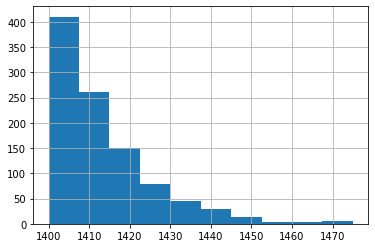

In [19]:
standings['total'].hist()

<AxesSubplot:>

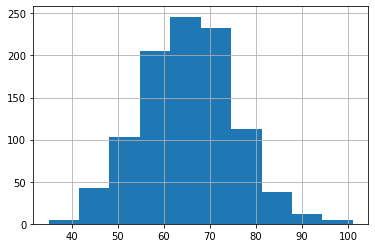

In [20]:
standings['event_total'].hist()

# This API give you detailed pickup for specific manager in specific gameweek
https://fantasy.premierleague.com/api/entry/[team-id]/event/[GW]/picks/

In [21]:
def get_pickups_for_top_managers(gw_number, top_managers_ids):
    picks_for_top_1000_manager_list = []
    i=1
    for entry in top_managers_ids:
        response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/'+str(gw_number)+'/picks/')
        #print(response_API.status_code)
        data = response_API.text
        parse_json = json.loads(data)
        '''if picks_for_top_1000_manager.empty:
            picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
        else:
            picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
        '''

        picks_for_top_1000_manager_list+=parse_json['picks']
        print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
        i+=1
    picks_for_top_1000_manager = pd.DataFrame(picks_for_top_1000_manager_list)
    return picks_for_top_1000_manager

In [22]:
gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
picks_for_top_1000_manager = get_pickups_for_top_managers(gw_number,standings['entry'])
picks_for_top_1000_manager.shape

(15000, 5)

In [23]:
picks_for_top_1000_manager.head()

,element,position,multiplier,is_captain,is_vice_captain
0,524,1,1,False,False
1,506,2,1,False,False
2,290,3,1,False,False
3,5,4,1,False,False
4,19,5,1,False,False


In [24]:
'''gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
i=1
for entry in standings['entry']:
    response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/'+str(gw_number)+'/picks/')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    '''
    '''if picks_for_top_1000_manager.empty:
        picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
    else:
        picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
    '''
    '''
    
    picks_for_top_1000_manager_list+=parse_json['picks']
    print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
    i+=1
#print('Number of picks:',len(picks_for_top_1000_manager_list))
#picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
#picks_for_top_1000_manager.shape'''

IndentationError: unexpected indent (4211405155.py, line 9)

In [25]:
picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

In [26]:
print('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
picks_for_top_1000_manager= pd.read_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

GW22_picks_for_top_1000_manager.csv


In [27]:
picks_for_top_1000_manager['element'] = picks_for_top_1000_manager['element'].astype("category")
picks_for_top_1000_manager.describe(include='all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,15000.000000,15000.0,15000.000000,15000.000000,15000,15000
unique,NaN,206.0,NaN,NaN,2,2
top,NaN,362.0,NaN,NaN,False,False
freq,NaN,923.0,NaN,NaN,14000,14000
mean,7499.500000,NaN,8.000000,0.805067,NaN,NaN
std,4330.271354,NaN,4.320638,0.538783,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,3749.750000,NaN,4.000000,0.000000,NaN,NaN
50%,7499.500000,NaN,8.000000,1.000000,NaN,NaN
75%,11249.250000,NaN,12.000000,1.000000,NaN,NaN


In [28]:
picks_for_top_100_manager = picks_for_top_1000_manager.head(1500)
picks_for_top_100_manager.describe(include = 'all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,1500.000000,1500.0,1500.000000,1500.000000,1500,1500
unique,NaN,126.0,NaN,NaN,2,2
top,NaN,362.0,NaN,NaN,False,False
freq,NaN,94.0,NaN,NaN,1400,1400
mean,749.500000,NaN,8.000000,0.802667,NaN,NaN
std,433.157015,NaN,4.321935,0.540297,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,374.750000,NaN,4.000000,0.000000,NaN,NaN
50%,749.500000,NaN,8.000000,1.000000,NaN,NaN
75%,1124.250000,NaN,12.000000,1.000000,NaN,NaN


In [29]:
players_pick_count_for_top_1000_manager = picks_for_top_1000_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_1000_manager.describe()

,count
count,206.000000
mean,72.815534
std,167.798820
min,1.000000
25%,2.000000
50%,11.500000
75%,39.750000
max,923.000000


In [30]:
players_pick_count_for_top_100_manager = picks_for_top_100_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager[players_pick_count_for_top_100_manager['count']>0]
players_pick_count_for_top_100_manager.shape

(126, 2)

In [31]:
players_pick_count_for_top_1000_manager['percentage_over_1000'] = (players_pick_count_for_top_1000_manager['count']/1000)*100

In [32]:
players_pick_count_for_top_1000_manager.describe()

,count,percentage_over_1000
count,206.000000,206.000000
mean,72.815534,7.281553
std,167.798820,16.779882
min,1.000000,0.100000
25%,2.000000,0.200000
50%,11.500000,1.150000
75%,39.750000,3.975000
max,923.000000,92.300000


In [33]:
players_pick_count_for_top_100_manager['percentage_over_100'] = (players_pick_count_for_top_100_manager['count']/100)*100

In [34]:
players_pick_count_for_top_100_manager.describe()

,count,percentage_over_100
count,126.000000,126.000000
mean,11.904762,11.904762
std,20.104299,20.104299
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.500000,3.500000
75%,10.750000,10.750000
max,94.000000,94.000000


In [35]:
players_pick_count_for_top_1000_manager.head(20)

,player_id,count,percentage_over_1000
0,362,923,92.3
1,60,916,91.6
2,19,819,81.9
3,524,750,75.0
4,506,702,70.2
5,85,657,65.7
6,343,621,62.1
7,353,608,60.8
8,5,551,55.1
9,131,510,51.0


In [36]:
players_pick_count_for_top_1000_manager = players_pick_count_for_top_1000_manager.set_index('player_id')

In [37]:
players_pick_count_for_top_1000_manager.index

CategoricalIndex([362,  60,  19, 524, 506,  85, 343, 353,   5, 131,
                  ...
                  525, 107,  92,  86, 384, 534, 173, 195, 358, 286],
                 categories=[5, 8, 12, 14, 19, 20, 23, 27, ...], ordered=False, dtype='category', name='player_id', length=206)

In [38]:
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager.set_index('player_id')

In [39]:
players_pick_count_for_top_100_manager.index

CategoricalIndex([362,  60,  19, 524,  85, 506, 343, 353,   5, 131,
                  ...
                  119, 558, 689,  42, 551,  34, 283, 757,  12, 599],
                 categories=[5, 8, 12, 14, 19, 20, 23, 27, ...], ordered=False, dtype='category', name='player_id', length=126)

In [40]:
top=[]
for player_id in players_pick_count_for_top_1000_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_1000_owned_percentage':players_pick_count_for_top_1000_manager.loc[player_id]['percentage_over_1000'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 362,
  'name': 'Palmer',
  'element_type': 3,
  'top_1000_owned_percentage': 92.30000000000001,
  'overall_owned_percentage': '38.4'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_1000_owned_percentage': 91.60000000000001,
  'overall_owned_percentage': '53.6'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_1000_owned_percentage': 81.89999999999999,
  'overall_owned_percentage': '60.7'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_1000_owned_percentage': 75.0,
  'overall_owned_percentage': '36.6'},
 {'id': 506,
  'name': 'Pedro Porro',
  'element_type': 2,
  'top_1000_owned_percentage': 70.19999999999999,
  'overall_owned_percentage': '34.5'},
 {'id': 85,
  'name': 'Solanke',
  'element_type': 4,
  'top_1000_owned_percentage': 65.7,
  'overall_owned_percentage': '26.8'},
 {'id': 343,
  'name': 'J.Alvarez',
  'element_type': 4,
  'top_1000_owned_percentage': 62.1,
  'overall_owned_percentage': '33.9'},
 {'id': 353,
  'name': 'Foden',
 

In [41]:
top_owned_players_for_top_1000_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_1000_manager.head(15)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,362,Palmer,3,92.3,38.4
1,60,Watkins,4,91.6,53.6
2,19,Saka,3,81.9,60.7
3,524,Areola,1,75.0,36.6
4,506,Pedro Porro,2,70.2,34.5
5,85,Solanke,4,65.7,26.8
6,343,J.Alvarez,4,62.1,33.9
7,353,Foden,3,60.8,27.3
8,5,Gabriel,2,55.1,18.4
9,131,Estupiñan,2,51.0,28.9


In [42]:
top=[]
for player_id in players_pick_count_for_top_100_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_100_owned_percentage':players_pick_count_for_top_100_manager.loc[player_id]['percentage_over_100'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 362,
  'name': 'Palmer',
  'element_type': 3,
  'top_100_owned_percentage': 94.0,
  'overall_owned_percentage': '38.4'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_100_owned_percentage': 89.0,
  'overall_owned_percentage': '53.6'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_100_owned_percentage': 87.0,
  'overall_owned_percentage': '60.7'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_100_owned_percentage': 70.0,
  'overall_owned_percentage': '36.6'},
 {'id': 85,
  'name': 'Solanke',
  'element_type': 4,
  'top_100_owned_percentage': 68.0,
  'overall_owned_percentage': '26.8'},
 {'id': 506,
  'name': 'Pedro Porro',
  'element_type': 2,
  'top_100_owned_percentage': 66.0,
  'overall_owned_percentage': '34.5'},
 {'id': 343,
  'name': 'J.Alvarez',
  'element_type': 4,
  'top_100_owned_percentage': 65.0,
  'overall_owned_percentage': '33.9'},
 {'id': 353,
  'name': 'Foden',
  'element_type': 3,
  'top_100_owned_percentage': 63.0,
  '

In [43]:
top_owned_players_for_top_100_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_100_manager.head(15)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,362,Palmer,3,94.0,38.4
1,60,Watkins,4,89.0,53.6
2,19,Saka,3,87.0,60.7
3,524,Areola,1,70.0,36.6
4,85,Solanke,4,68.0,26.8
5,506,Pedro Porro,2,66.0,34.5
6,343,J.Alvarez,4,65.0,33.9
7,353,Foden,3,63.0,27.3
8,5,Gabriel,2,57.0,18.4
9,131,Estupiñan,2,55.0,28.9


In [44]:
top_owned_GK_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==1]
top_owned_GK_for_top_1000_manager.shape

(32, 5)

In [45]:
top_owned_GK_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==1]
top_owned_GK_for_top_100_manager.shape

(18, 5)

In [46]:
top_owned_GK_for_top_1000_manager

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
3,524,Areola,1,75.0,36.6
10,409,Dubravka,1,50.8,8.7
24,28,Turner,1,13.0,12.1
28,275,Leno,1,11.9,16.2
37,113,Raya,1,8.7,6.3
38,263,Pickford,1,7.8,10.0
45,77,Neto,1,5.3,3.4
47,49,Martinez,1,4.9,12.4
50,352,Ederson M.,1,4.1,15.2
71,291,A.Becker,1,2.5,14.4


In [47]:
top_owned_GK_for_top_100_manager

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
3,524,Areola,1,70.0,36.6
12,409,Dubravka,1,44.0,8.7
17,275,Leno,1,22.0,16.2
29,28,Turner,1,12.0,12.1
32,113,Raya,1,10.0,6.3
36,263,Pickford,1,8.0,10.0
37,49,Martinez,1,8.0,12.4
42,77,Neto,1,7.0,3.4
51,301,Kelleher,1,5.0,1.5
58,352,Ederson M.,1,4.0,15.2


In [48]:
top_owned_DF_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==2]
top_owned_DF_for_top_1000_manager.shape

(81, 5)

In [49]:
top_owned_DF_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==2]
top_owned_DF_for_top_100_manager.shape

(54, 5)

In [50]:
top_owned_DF_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
4,506,Pedro Porro,2,70.2,34.5
8,5,Gabriel,2,55.1,18.4
9,131,Estupiñan,2,51.0,28.9
12,290,Alexander-Arnold,2,46.7,21.1
15,20,Saliba,2,26.9,36.9
17,369,Walker,2,23.2,18.1
19,203,Gusto,2,20.8,7.1
20,178,Taylor,2,17.7,4.5
21,430,Trippier,2,15.1,38.2
25,31,Zinchenko,2,12.6,10.7


In [51]:
top_owned_DF_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
5,506,Pedro Porro,2,66.0,34.5
8,5,Gabriel,2,57.0,18.4
9,131,Estupiñan,2,55.0,28.9
11,290,Alexander-Arnold,2,46.0,21.1
15,369,Walker,2,25.0,18.1
16,203,Gusto,2,25.0,7.1
18,20,Saliba,2,19.0,36.9
19,321,Doughty,2,18.0,4.6
23,31,Zinchenko,2,15.0,10.7
24,519,Udogie,2,14.0,9.9


In [52]:
top_owned_MID_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==3]
top_owned_MID_for_top_1000_manager.shape

(64, 5)

In [53]:
top_owned_MID_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==3]
top_owned_MID_for_top_100_manager.shape

(35, 5)

In [54]:
top_owned_MID_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,362,Palmer,3,92.3,38.4
2,19,Saka,3,81.9,60.7
7,353,Foden,3,60.8,27.3
11,509,Richarlison,3,48.5,13.6
13,294,Diogo J.,3,45.8,11.5
14,349,De Bruyne,3,39.5,28.3
16,526,Bowen,3,25.1,25.7
18,412,Gordon,3,21.0,21.6
27,134,Gross,3,12.0,5.8
34,308,Salah,3,10.4,21.1


In [55]:
top_owned_MID_for_top_100_manager.head(41)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,362,Palmer,3,94.0,38.4
2,19,Saka,3,87.0,60.7
7,353,Foden,3,63.0,27.3
10,294,Diogo J.,3,48.0,11.5
13,509,Richarlison,3,42.0,13.6
14,349,De Bruyne,3,36.0,28.3
21,412,Gordon,3,18.0,21.6
22,526,Bowen,3,16.0,25.7
30,134,Gross,3,11.0,5.8
31,308,Salah,3,11.0,21.1


In [56]:
top_owned_FWD_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==4]
top_owned_FWD_for_top_1000_manager.shape

(29, 5)

In [57]:
top_owned_FWD_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==4]
top_owned_FWD_for_top_100_manager.shape

(19, 5)

In [58]:
top_owned_FWD_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
1,60,Watkins,4,91.6,53.6
5,85,Solanke,4,65.7,26.8
6,343,J.Alvarez,4,62.1,33.9
22,355,Haaland,4,15.0,58.5
23,293,Darwin,4,13.1,15.3
29,33,Archer,4,11.9,6.1
31,117,Toney,4,10.7,5.6
32,135,João Pedro,4,10.6,12.9
43,590,Cunha,4,5.5,6.1
72,415,Isak,4,2.4,15.0


In [59]:
top_owned_FWD_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
1,60,Watkins,4,89.0,53.6
4,85,Solanke,4,68.0,26.8
6,343,J.Alvarez,4,65.0,33.9
20,355,Haaland,4,18.0,58.5
25,117,Toney,4,13.0,5.6
26,135,João Pedro,4,12.0,12.9
40,293,Darwin,4,8.0,15.3
45,33,Archer,4,7.0,6.1
54,590,Cunha,4,5.0,6.1
57,415,Isak,4,4.0,15.0
